In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

In [4]:
x,y = make_blobs(random_state=1)

In [5]:
agg=  AgglomerativeClustering(n_clusters=3)
a= agg.fit_predict(x)

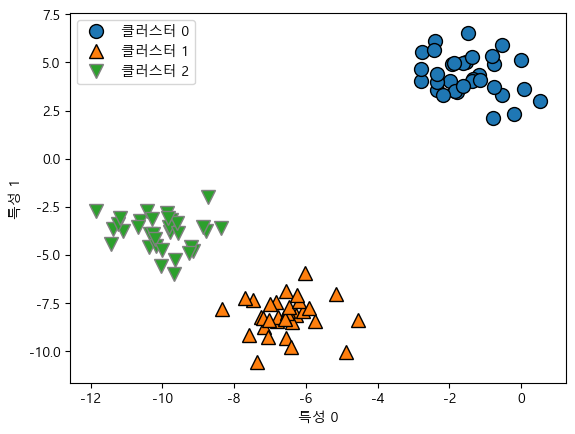

In [6]:
mglearn.discrete_scatter(x[:,0], x[:,1], a)
plt.legend(['클러스터 0','클러스터 1','클러스터 2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [7]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage

In [8]:
x, y = make_blobs(random_state=0, n_samples=12)

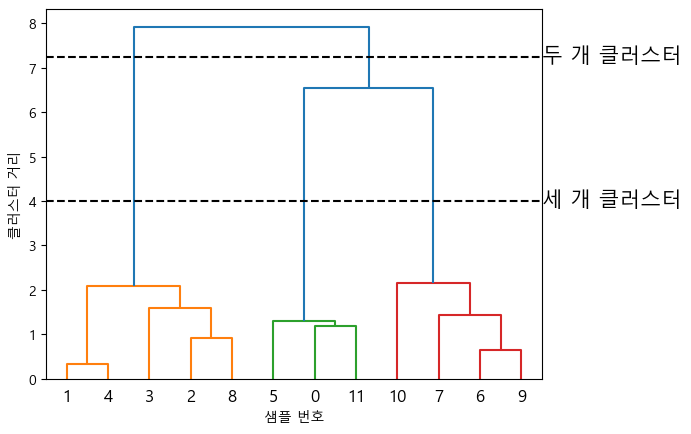

In [9]:
# 데이터 배열에 x에 ward 함수를 적용
# 계층적군집을 수행할 때 거리 정보가 담긴 배열을 리턴
linkage_array = ward(x)

# 클러스터 간 거리 정보가 담긴 linkage_array를 사용해서 덴드로그램을 그림
dendrogram(linkage_array)

# 클러스터 갯수를 구분하는 라인을 그어서 그려봄
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], "--", c="k")
ax.plot(bounds, [4, 4], "--", c="k")

ax.text(bounds[1], 7.25, "두 개 클러스터", va="center",
        fontdict={"size" : 15})

ax.text(bounds[1], 4, "세 개 클러스터", va="center",
        fontdict={"size" : 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
plt.show()

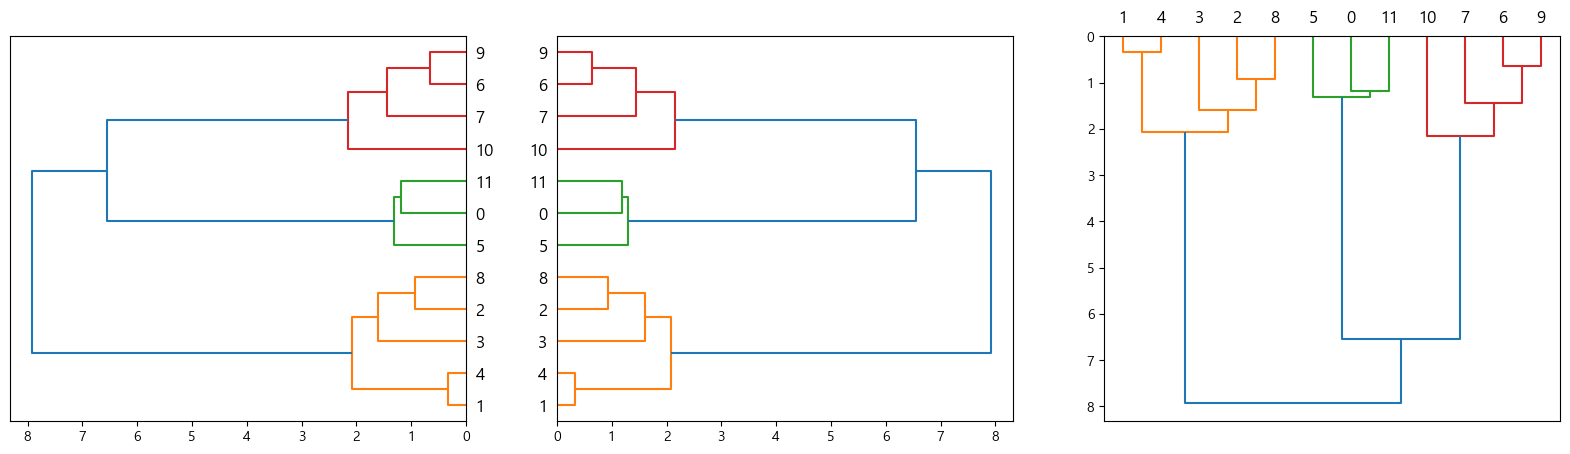

In [10]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
d1 = linkage(x, method="ward")
dr1 = dendrogram(d1, orientation="left")

ax2 = fig.add_subplot(1,3,2)
dr2 = dendrogram(d1, orientation="right")

ax2 = fig.add_subplot(1,3,3)
dr3 = dendrogram(d1, orientation="bottom")

### DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbscan = DBSCAN()
pred = dbscan.fit_predict(x)

In [13]:
print("클러스터 레이블: ", pred)

클러스터 레이블:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [50]:
x, y = make_moons(n_samples = 200, noise= 0.05, random_state=0)

In [51]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

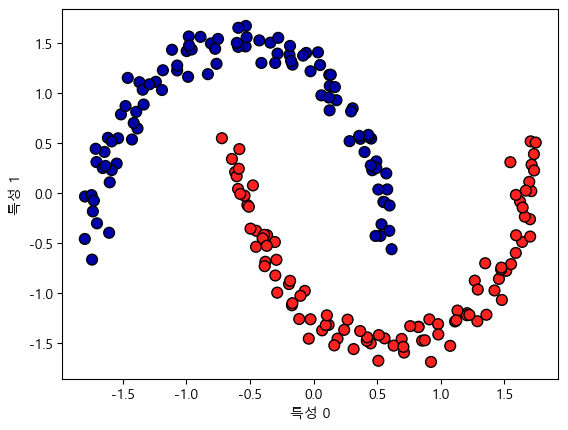

In [52]:
clusters = dbscan.fit_predict(x_scaled)
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters,
            cmap=mglearn.cm2, s=60, edgecolors="black")
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()
